In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [204]:
df = pd.read_csv('C:\\Users\\isarachchand\\Documents\\git\\apf\\fraud\\fraud_detection_classification\\data\\fraud_dataset_example.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


### **Check Missing Value**

In [205]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### **Exploratory Data Analysis**

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [207]:
object_cols = df.dtypes == 'object'
data_cols = list(object_cols[object_cols].index)
data_cols

['type', 'nameOrig', 'nameDest']

In [208]:
numeric_cols = (df.dtypes != 'object')
data_num = list(numeric_cols[numeric_cols].index)
data_num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

C:\Users\isarachchand\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

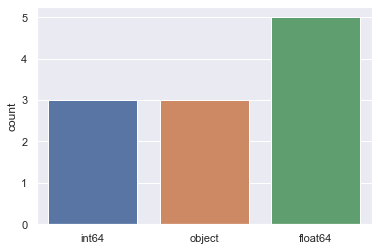

In [209]:
sns.countplot(df.dtypes.map(str))

In [210]:


df.type = df.type.str.strip().str.lower()



**Univariant Analysis**

In [211]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


C:\Users\isarachchand\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\isarachchand\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldbalanceOrg', ylabel='Density'>

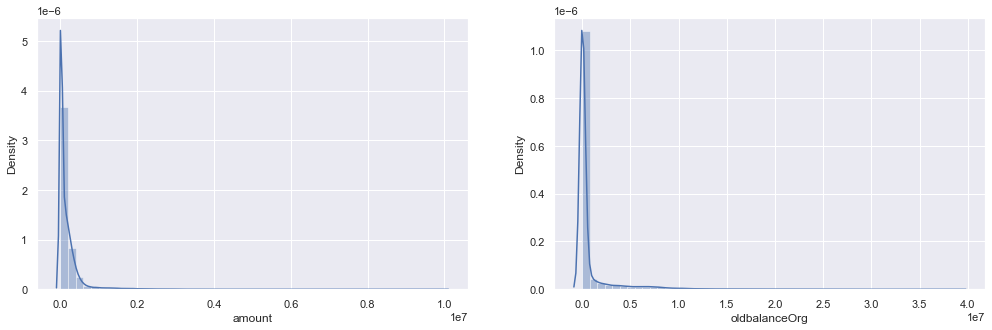

In [212]:
f = plt.figure(figsize=(17,5))

ax = f.add_subplot(121)
sns.distplot(df.amount)

ax = f.add_subplot(122)
sns.distplot(df.oldbalanceOrg)

C:\Users\isarachchand\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\isarachchand\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldbalanceDest', ylabel='Density'>

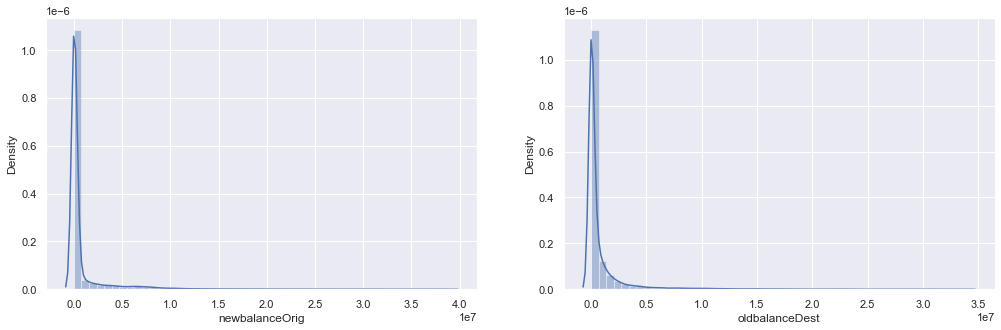

In [213]:
f = plt.figure(figsize=(17,5))

ax = f.add_subplot(121)
sns.distplot(df.newbalanceOrig)

ax = f.add_subplot(122)
sns.distplot(df.oldbalanceDest)

C:\Users\isarachchand\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

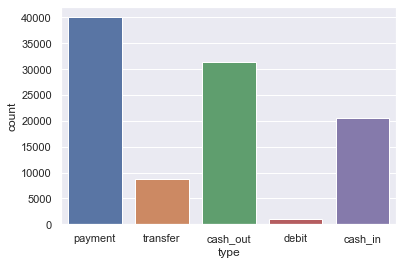

In [214]:
sns.countplot(df.type)

C:\Users\isarachchand\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\isarachchand\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

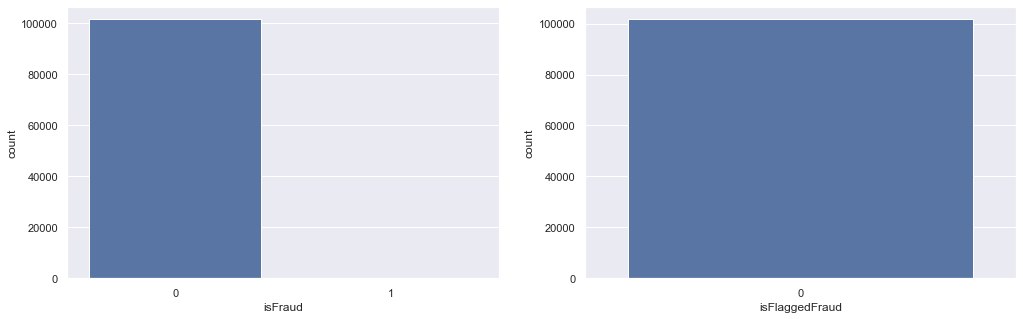

In [215]:
f = plt.figure(figsize=(17,5))

ax = f.add_subplot(121)
sns.countplot(df.isFraud)

ax = f.add_subplot(122)
sns.countplot(df.isFlaggedFraud)

- fraud data with no fraud is not balanced

- The Flaggedfraud only has a value of 0, so we delete the column to make it easier for the model to find predictions

**Bivariant Analysis**

<AxesSubplot:>

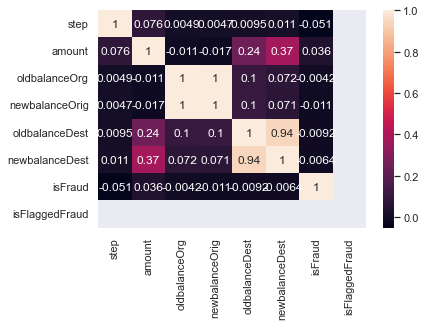

In [216]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='type'>

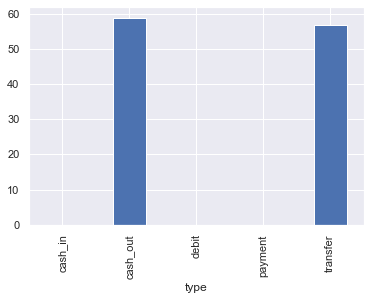

In [217]:
df_group = df.groupby('type')['isFraud'].sum().plot(kind='bar')
df_group

### **Modeling**

In [218]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [219]:
num_col_train = ['step', 'type', 'nameOrig', 'nameDest', 'isFlaggedFraud', 'isFraud']
num_col_train

['step', 'type', 'nameOrig', 'nameDest', 'isFlaggedFraud', 'isFraud']

In [220]:
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest']]
y = df.isFraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [221]:
X_train.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [222]:
numeric_pipeline = Pipeline([
    ('scaling', StandardScaler())
])

categoric_pipeline = Pipeline([
    ('encode', OrdinalEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']),
#     ('categoric', categoric_pipeline, ['type'])
])

pipeline = Pipeline([
    ('pre', preprocessor),
    ('algo', RandomForestClassifier(random_state=42))
])

In [223]:
parameter = {
    'algo__n_estimators':[100,200, 350, 500], 
    'algo__min_samples_leaf':[2, 10, 30]
}

In [224]:
model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)

model.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['amount',
                                                                          'oldbalanceOrg',
                                                                          'newbalanceOrig',
                                                                          'oldbalanceDest',
                                                                          'newbalanceDest'])])),
                                       ('algo',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'

In [225]:
print(model.score(X_train, y_train)), print(model.score(X_test, y_test))
print("done")

0.9993972198302374
0.9991143039905526
done


In [226]:
y_predicted = model.predict(X_test)


# print(X_test.head)



In [227]:
X_test['isFraudPredicted'] = y_predicted
X_test['isFraud'] = y_test

#utputdata = np.array(y_predicted, y_test)

#new_array = np.append(X_test, y_predicted, axis = 1)
#new_array = np.append(new_array, y_test, axis = 1)

#rint(outputdata.shape)
df_fraud_classify = pd.DataFrame(X_test)

file_name = r'C:\Users\isarachchand\Documents\git\apf\output\fraud\predict_credit_card_fraud\fraud_dataset_output.csv'
df_fraud_classify.to_csv(file_name,encoding='utf-8', index=False)

C:\Users\ISARAC~1\AppData\Local\Temp/ipykernel_22244/631632362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['isFraudPredicted'] = y_predicted
C:\Users\ISARAC~1\AppData\Local\Temp/ipykernel_22244/631632362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['isFraud'] = y_test
